# Loss functions and gradients in algorithmic recourse

This is a short tutorial on gradients typically involved in optimization problems of algorithmic recourse.

In [38]:
using Zygote

## General setup

Let $t\in\{0,1\}$ denote the target label, $f\in\{0,1\}$ the predicted label and $x'\in\mathbb{R}^D$ the vector of counterfactual features. Then the optimization problem in algorithmic recourse is generally of the following form:

$$
x' = \arg \min_{x'} \max _{\lambda} \lambda \ell(f,t,x') + h(x')
$$

where $\ell$ denotes some loss function targeting the deviation between the target label and the predicted label and $h(\cdot)$ as a complexity penality generally addressing the *realism* or *cost* of the proposed counterfactual. 

## Loss function $\ell$

Different choices for $\ell$ come to mind, each potentially leading to very different counterfactual outcomes. Typically, $\ell$ is computed with respect to the *logits* $a=\mathbf{w}'x$ produced by the classifier. Common choices for $\ell$ in the literature have included *Hinge* and *cross-entropy* (or *log*) loss. We shall look at these in some more details here.

### Hinge loss

Hinge loss is generally defined for the target domain $\{-1,1\}$ as follows:

$$
\ell(y,t)=(t-y)_+=\max\{0,t-y\}
$$

In our context we have $y=z \mathbf{w}'x_{\text{cf}}$ where 

$$
\begin{aligned}
z&=\begin{cases}
-1 && \text{if} && f=0 \\ f && \text{if} && f=1
\end{cases}
\end{aligned}
$$

In [34]:
hinge(y,t) = max(0,t-y)

hinge (generic function with 1 method)

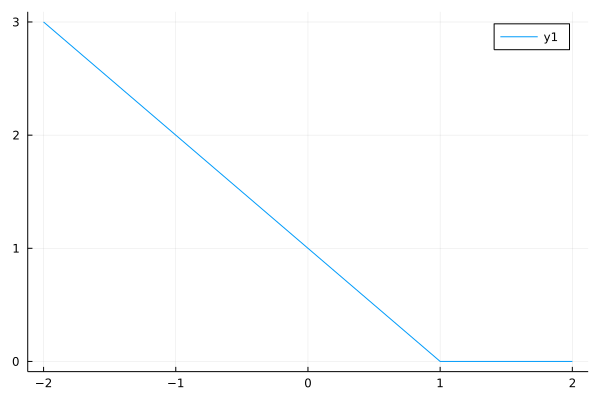

In [44]:
using Plots
a = -2:0.1:2
plot(a, [hinge(a,1) for a=a])

The first-order derivative of Hinge loss is simply:

$$

$$

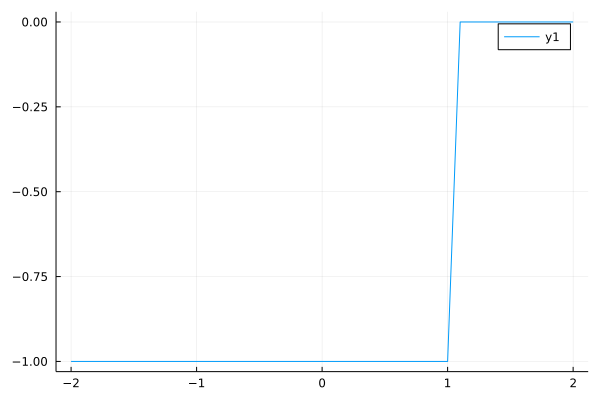

In [45]:
plot(a, [gradient(hinge,a,1)[1] for a=a])

### Cross-entropy loss (binary)

Binary cross-entropy loss or log loss is typically defined as follows:

$$
\ell(y,t)=- \left( t \cdot \log(y) + (1-t) \cdot \log (1-y) \right)
$$

where $y=\sigma(\mathbf{w}'x_{CF})$

In [49]:
# Softmax function:
function 𝛔(a)
    trunc = 8.0 # truncation to avoid numerical over/underflow
    a = clamp.(a,-trunc,trunc)
    p = exp.(a)
    p = p ./ (1 .+ p)
    return p
end

# Binary crossentropy:
crossentropy(y, t) = - (t * log(𝛔(y)) + (1-t) * log(1-𝛔(y)))

crossentropy (generic function with 1 method)

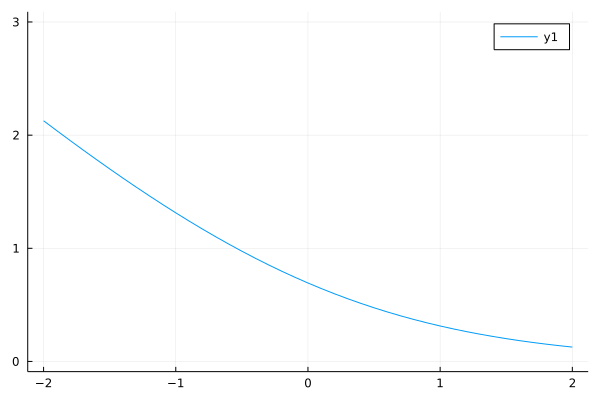

In [50]:
plot(a, [crossentropy(a,1) for a=a], xlims=[-2,2], ylims=[0,3])

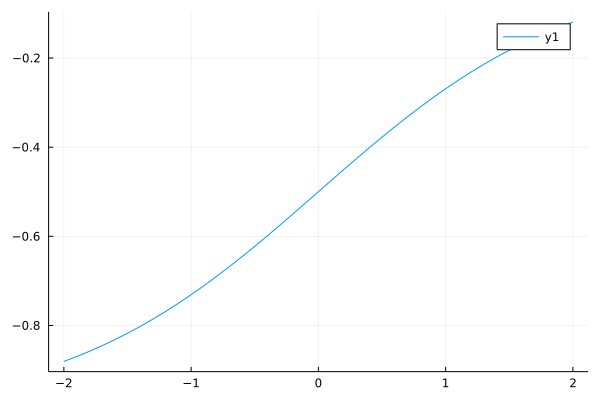

In [51]:
plot(a, [gradient(crossentropy,a,1)[1] for a=a])